<a href="https://colab.research.google.com/github/N333l/AIML/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

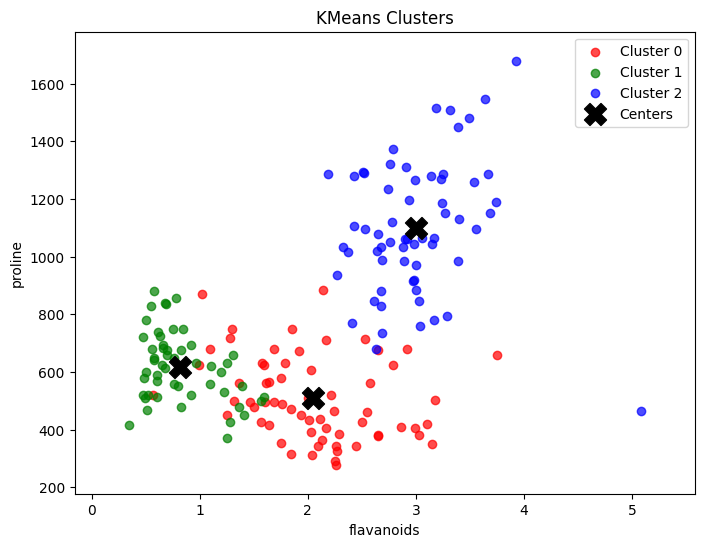

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Standardize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[wine.feature_names])

# Fit KMeans with 3 clusters (default n_init=10 for best run)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Choose features to plot
x_feature = 'flavanoids'
y_feature = 'proline'

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for cluster in range(3):
    clustered_points = df[df['cluster'] == cluster]
    plt.scatter(clustered_points[x_feature], clustered_points[y_feature],
                label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

# Plot cluster centers (convert scaled centers back to original scale)
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
plt.scatter(centers[:, wine.feature_names.index(x_feature)],
            centers[:, wine.feature_names.index(y_feature)],
            s=250, c='black', marker='X', label='Centers')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('KMeans Clusters')
plt.legend()

# Zoom plot to better see cluster separation
plt.xlim(df[x_feature].min() - 0.5, df[x_feature].max() + 0.5)
plt.ylim(df[y_feature].min() - 100, df[y_feature].max() + 100)

plt.show()


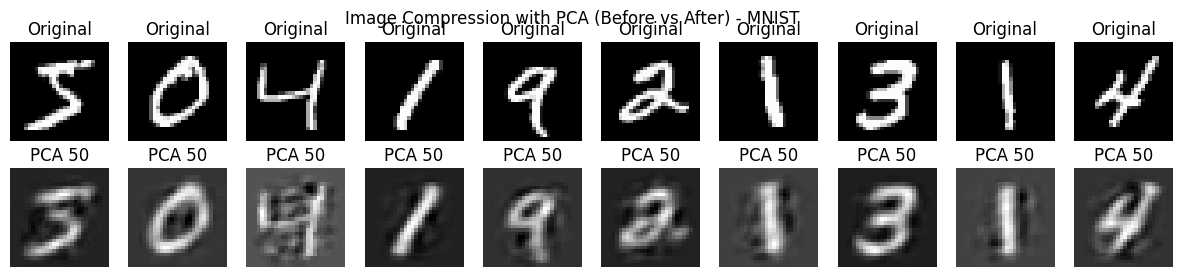

Explained Variance with 50 components: 69.02%


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

# 1. Load dataset
(X_train, _), (_, _) = mnist.load_data()

# Use a small subset for speed
X_subset = X_train[:1000]
X_flat = X_subset.reshape(X_subset.shape[0], -1)

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# 3. Apply PCA with 50 components
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# 4. Reconstruct the images from PCA
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed = scaler.inverse_transform(X_reconstructed)
X_reconstructed = X_reconstructed.reshape(-1, 28, 28)

# 5. Visualize original vs reconstructed
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    # Original images
    axes[0, i].imshow(X_subset[i], cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # PCA Reconstructed images
    axes[1, i].imshow(X_reconstructed[i], cmap='gray')
    axes[1, i].set_title("PCA 50")
    axes[1, i].axis('off')

plt.suptitle("Image Compression with PCA (Before vs After) - MNIST")
plt.show()

print(f"Explained Variance with 50 components: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")


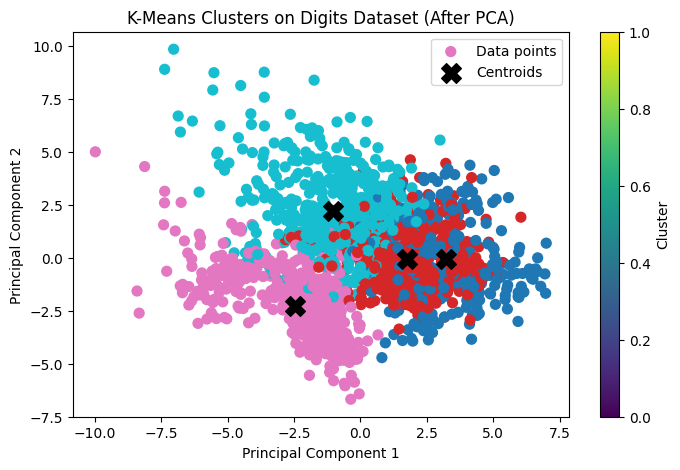

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load Digits dataset
digits = load_digits()
X = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 4. PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Transform centroids to PCA space
centroids = pca.transform(kmeans.cluster_centers_)

# 6. Plot clusters and centroids
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters on Digits Dataset (After PCA)")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()
